### Machine Learning model(classification) for the fruits database

Importing the necessary Libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading the Datasets

We have converted the dataset in to dataframe using Excel

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
df= pd.read_csv("/content/drive/MyDrive/Yashwant_Jangid_Major_Project/df.csv")

In [10]:
df.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fruit_label    59 non-null     int64  
 1   fruit_name     59 non-null     object 
 2   fruit_subtype  59 non-null     object 
 3   mass           59 non-null     int64  
 4   width          59 non-null     float64
 5   height         59 non-null     float64
 6   color_score    59 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.4+ KB


In [12]:
df.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


In [13]:
df.shape

(59, 7)

In [14]:
df.isnull().sum()

fruit_label      0
fruit_name       0
fruit_subtype    0
mass             0
width            0
height           0
color_score      0
dtype: int64

In [15]:
df.duplicated().sum()

0

No duplicates and null values

In [16]:
df.sample(5)

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
26,3,orange,spanish_jumbo,362,9.6,9.2,0.74
42,3,orange,turkey_navel,154,7.2,7.2,0.82
48,4,lemon,spanish_belsan,174,7.3,10.1,0.72
32,3,orange,selected_seconds,164,7.2,7.0,0.80
17,1,apple,golden_delicious,168,7.5,7.6,0.73


In [17]:

lookup_fruits_name = dict(zip(df.fruit_label.unique(),df.fruit_name.unique()))
lookup_fruits_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

In [18]:
df['fruit_name'].value_counts()

apple       19
orange      19
lemon       16
mandarin     5
Name: fruit_name, dtype: int64

Visualization

<Axes: >

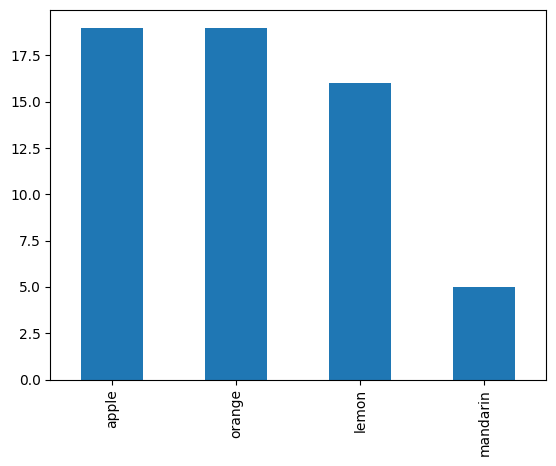

In [19]:
df['fruit_name'].value_counts().plot(kind='bar')

In [20]:
df.sample()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
46,4,lemon,spanish_belsan,216,7.3,10.2,0.71


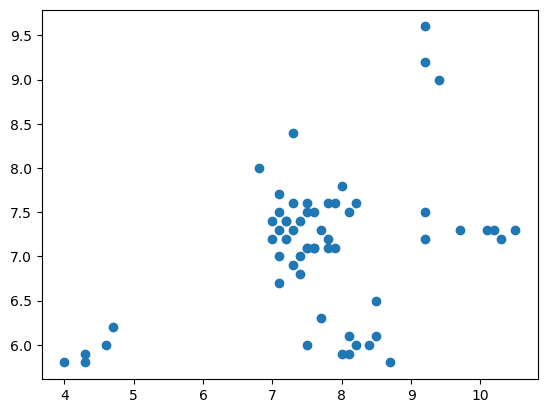

In [21]:
plt.scatter(x=df['height'],y=df['width'])

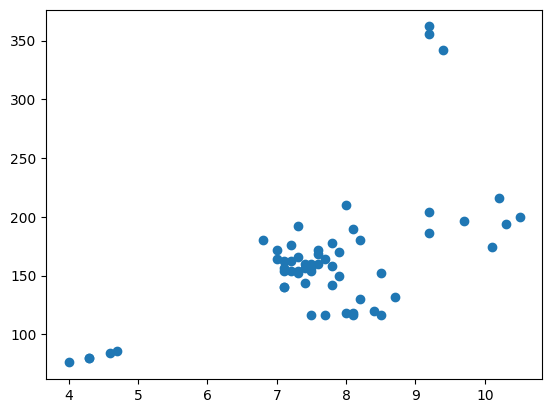

In [22]:
plt.scatter(df['height'],df['mass'])

<Axes: ylabel='color_score'>

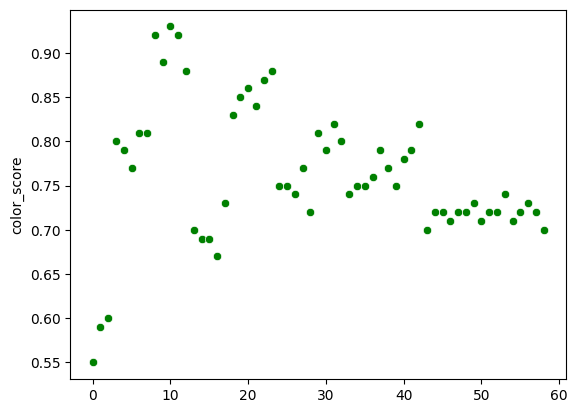

In [23]:
sns.scatterplot(df['color_score'],color='green')

In [24]:
df.sample()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55


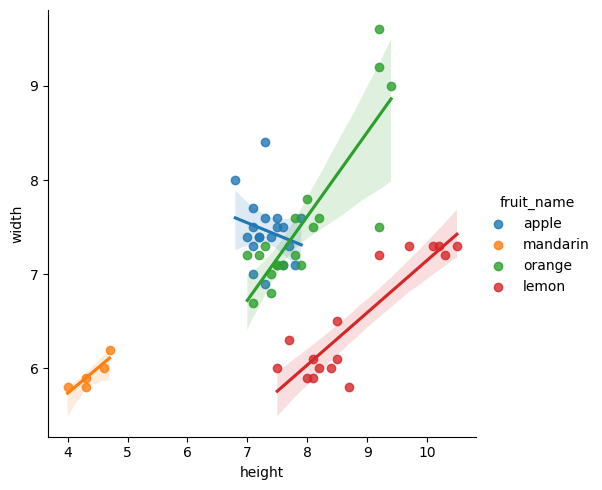

In [25]:
sns.lmplot(x = 'height', y = 'width', hue = 'fruit_name', data = df)

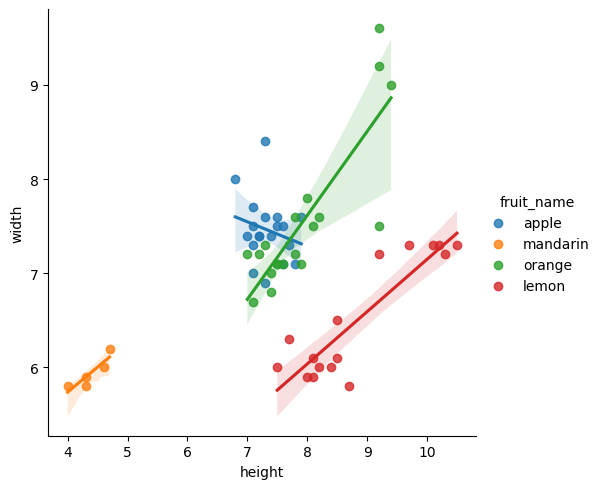

In [26]:
sns.lmplot(x = 'height', y = 'width', hue = 'fruit_name', data = df)

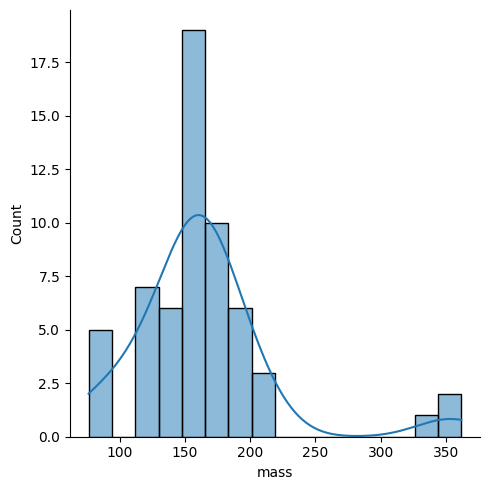

In [27]:
sns.displot(x=df['mass'],kde=True)

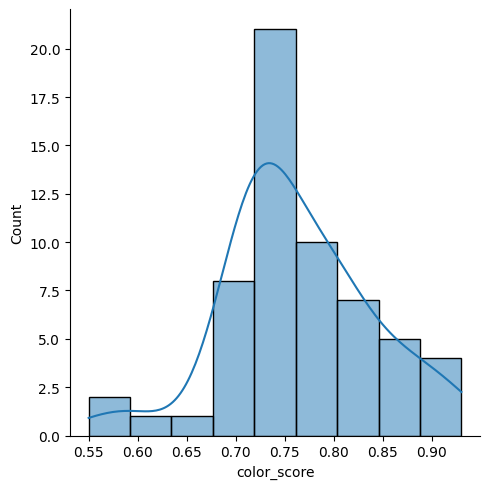

In [28]:
sns.displot(x=df['color_score'],kde=True)

MACHINE LEARNING MODELS

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [30]:
X= df[['mass','width', 'height','color_score']]
y = df['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20,random_state=20)

In [31]:
#KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5,metric='euclidean')

In [32]:

knn.fit(X_train, y_train)
knn.score(X_test, y_test)
y_pred=knn.predict(X)
accuracy_score(y,y_pred)

0.711864406779661

In [33]:
# Ada-Boost Classifier
from sklearn.ensemble import AdaBoostClassifier

In [34]:
ada=AdaBoostClassifier()

ada.fit(X_train, y_train)
ada.score(X_test, y_test)
y_pred=ada.predict(X)
accuracy_score(y,y_pred)


0.6271186440677966

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [36]:
#Decision Tree
dec=DecisionTreeClassifier()

dec.fit(X_train, y_train)
dec.score(X_test, y_test)
y_pred=dec.predict(X)
accuracy_score(y,y_pred)


0.9830508474576272

In [37]:
#Random Forest

from numpy.random.mtrand import random

randomf = RandomForestClassifier()
randomf.fit(X_train, y_train)
randomf.score(X_test, y_test)
y_pred=randomf.predict(X)
accuracy_score(y,y_pred)


1.0

In [38]:
# GradientBoosting Classifier
grad= GradientBoostingClassifier()

grad.fit(X_train, y_train)
grad.score(X_test, y_test)
y_pred=grad.predict(X)
accuracy_score(y,y_pred)

1.0

In [39]:
fruit_prediction = grad.predict([[194, 8.5, 7.3, 0.55]])
lookup_fruits_name[fruit_prediction[0]]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


'apple'

## *We can see that Random Forest Classifier and Gradient Boosting Classifier giving us the accuracy as 1.0 i.e. Best of all accuracy.

## *So we can use any of these two Algorithms for this dataset.

**Thank You !**